In [122]:
from patsy import dmatrix
from statsmodels.graphics import utils

In [3]:
df_train = pd.read_csv("../data/train_no_missing.csv")

In [137]:
# report 확인
def LinearRegR(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    return result.summary()
    

# 예측치와 추정치 결과 확인 (위치도 출력)
# plot_leverage_resid2, influence_plot 확인
def LinearReg(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values
    plt.scatter(target, predict)
    
    
def LinearRegO(data, formual, num_param):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values

    ax = plt.subplot()
    plt.scatter(target, predict)
    cook_d2, pvals = result.get_influence().cooks_distance
    fox_cr = 4 / (len(y) - num_param)
    idx = np.where(cook_d2 > fox_cr)[0]
    plt.scatter(target[idx], predict[idx], s=300, c="r", alpha=0.5)
    utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(target[idx], predict[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
    
    
    sm.graphics.influence_plot(result)
    
def LinearRegExo(data, formual, column):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    fig = sm.graphics.plot_regress_exog(result, column)
    fig.set_size_inches(10, 10)
# 그래프 보기( 잔차 ) / 컬럼 값이 입력
# plot_regress_exog(fitting plit, residal-x, partial, CCPR)

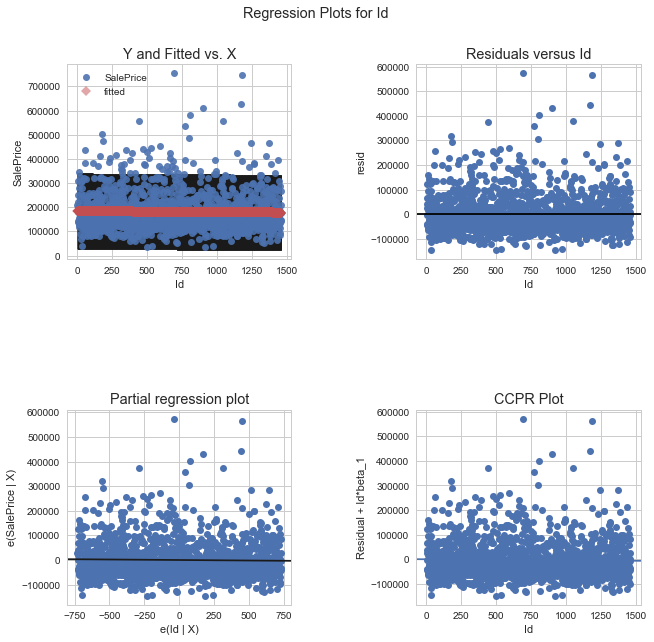

In [138]:
LinearRegExo(df_train, "SalePrice~Id", "Id")